 ============================================================
 Project: Satellite-Based Property Price Valuation
 Author: Priyanshu Maurya(23113119)

 NOTE:
 This notebook/script contains the complete implementation
 of the project. For clarity and reproducibility, the code
 sections correspond to the following required files:

 1. data_fetcher.py
    - Satellite image download using Mapbox API
    - Train and test image fetching based on latitude/longitude

 2. preprocessing.ipynb
    - Data cleaning and type casting
    - Outlier removal
    - Feature engineering (log-transformed price)
    - Exploratory Data Analysis (EDA & plots)

 3. model_training.ipynb
    - Multimodal deep learning model (CNN + tabular features)
    - Training loop and loss optimization
    - Train dataset evaluation (error analysis, R² score)
    - Test dataset price prediction and CSV generation

 The project was developed iteratively in a single file
 for experimentation and debugging. The logical separation
 of code sections aligns with the required modular structure.
 ============================================================


In [ ]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Data cleaning + EDA + feature engineering

df_train = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/train(1)(train(1)).csv")
df_test  = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/test2(test(1)).csv")


In [228]:
df_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


In [229]:
df_train


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [230]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [231]:
df_train.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [232]:
df_train["bedrooms"] = df_train["bedrooms"].astype(int)
df_train["bathrooms"] = df_train["bathrooms"].astype(float)
df_train["sqft_living"] = df_train["sqft_living"].astype(float)
df_train["price"] = df_train["price"].astype(float)


In [ ]:
df_train = df_train[
    (df_train["lat"].between(-90, 90)) &
    (df_train["long"].between(-180, 180))
]


In [13]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643.0,4,2.25,1810.0,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000.0,3,2.50,1600.0,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000.0,4,2.50,1720.0,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499.0,2,2.25,1240.0,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000.0,3,2.00,1280.0,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000.0,3,1.50,1000.0,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950.0,3,2.50,3087.0,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000.0,3,2.50,2120.0,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000.0,1,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


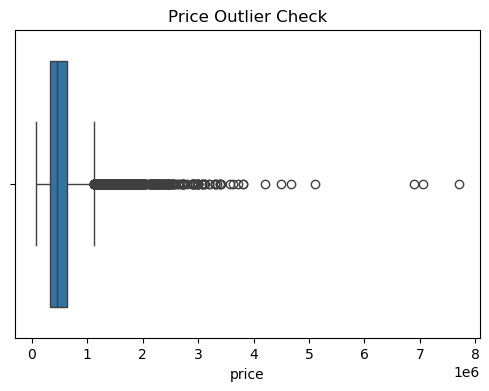

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_train["price"])
plt.title("Price Outlier Check")
plt.show()


In [15]:
upper = df_train["price"].quantile(0.99)
df_train = df_train[df_train["price"] <= upper]


In [18]:
df_train["log_price"] = np.log1p(df_train["price"])


/var/folders/77/38ds54b95ld56fzf7tm598bm0000gn/T/ipykernel_3023/1280344472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["log_price"] = np.log1p(df_train["price"])


In [19]:
df_train.to_csv("data/clean_train.csv", index=False)
df_test.to_csv("data/clean_test.csv", index=False)


In [243]:

df = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/clean_train.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,9117000170,20150505T000000,268643.0,4,2.25,1810.0,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,12.501142
1,6700390210,20140708T000000,245000.0,3,2.50,1600.0,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,12.409018
2,7212660540,20150115T000000,200000.0,4,2.50,1720.0,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,12.206078
3,8562780200,20150427T000000,352499.0,2,2.25,1240.0,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,12.772806
4,7760400350,20141205T000000,232000.0,3,2.00,1280.0,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,12.354497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,5272200045,20141113T000000,378000.0,3,1.50,1000.0,6914,1.0,0,0,...,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,12.842652
16042,9578500790,20141111T000000,399950.0,3,2.50,3087.0,5002,2.0,0,0,...,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,12.899097
16043,7202350480,20140930T000000,575000.0,3,2.50,2120.0,4780,2.0,0,0,...,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,13.262127
16044,1723049033,20140620T000000,245000.0,1,0.75,380.0,15000,1.0,0,0,...,380,0,1963,0,98168,47.4810,-122.323,1170,15000,12.409018


<Figure size 700x400 with 0 Axes>

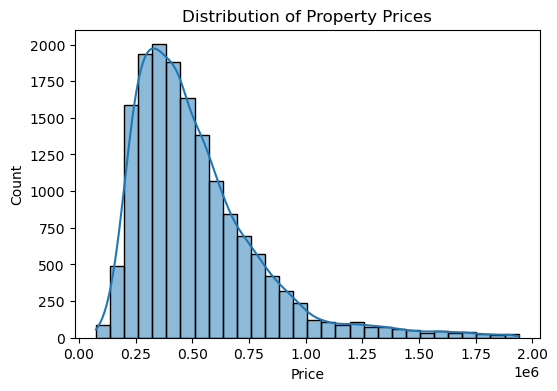

In [244]:
# price distribution graph 
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=30, kde=True)
plt.xlabel("Price")
plt.title("Distribution of Property Prices")
plt.show()


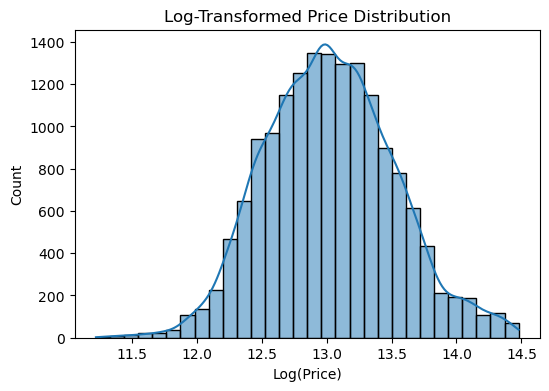

In [245]:
# Log(Price) Distribution
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(6,4))
sns.histplot(df["log_price"], bins=30, kde=True)
plt.xlabel("Log(Price)")
plt.title("Log-Transformed Price Distribution")
plt.show()


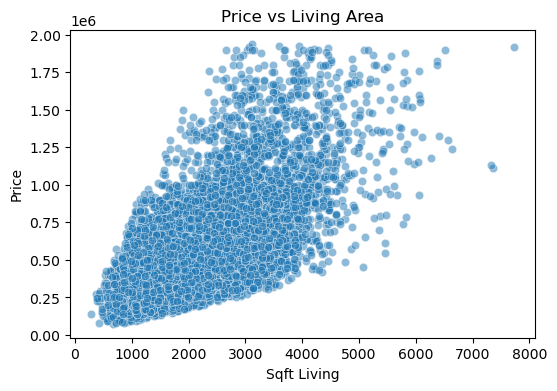

In [246]:
# Price vs Sqft Living
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["sqft_living"],
    y=df["price"],
    alpha=0.5
)
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Price vs Living Area")
plt.show()


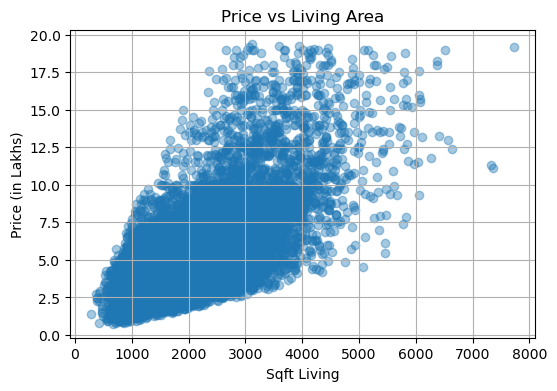

In [247]:
# Price ko Lakhs (₹ in Lakhs) , Price vs Sqft Living
plt.figure(figsize=(6,4))
plt.scatter(
    df["sqft_living"],
    df["price"] / 1e5,   # convert to lakhs
    alpha=0.4
)

plt.xlabel("Sqft Living")
plt.ylabel("Price (in Lakhs)")
plt.title("Price vs Living Area")
plt.grid(True)
plt.show()


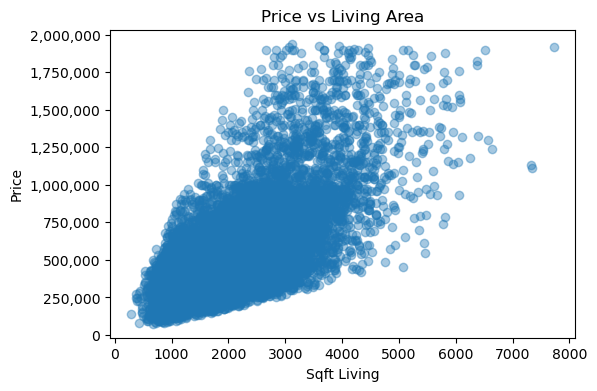

In [248]:
# ye original price me karna hai , price vs sqft living

import matplotlib.ticker as mtick

plt.figure(figsize=(6,4))
plt.scatter(df["sqft_living"], df["price"], alpha=0.4)

plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Price vs Living Area")

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.0f}')
)

plt.show()


In [249]:
highest_price_row = df.loc[df["price"].idxmax()]
print(highest_price_row)


id                    9809000020
date             20150313T000000
price                  1940000.0
bedrooms                       5
bathrooms                   2.25
sqft_living               3120.0
sqft_lot                   16672
floors                       2.0
waterfront                     0
view                           0
condition                      4
grade                          9
sqft_above                  3120
sqft_basement                  0
yr_built                    1969
yr_renovated                   0
zipcode                    98004
lat                      47.6458
long                    -122.219
sqft_living15               3740
sqft_lot15                 17853
log_price              14.478199
Name: 4769, dtype: object


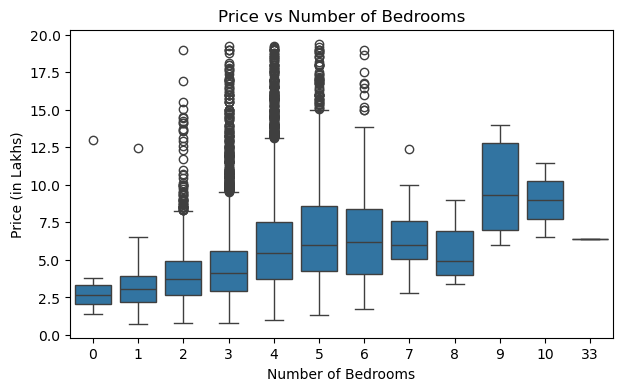

In [250]:
# Price vs Number of Bedrooms
# iska scatter plot nhi bnaya kyuki Bedrooms categorical / discrete variable hai, Same bedroom count ke hundreds of points ho jaate hain, Scatter plot me over-plotting hoti hai, Pattern clearly dikhai nahi deta, 
# isliye boxplot use kiya hai 
# and hmi pe satellite image justify hoti hai.

plt.figure(figsize=(7,4))
sns.boxplot(
    x=df["bedrooms"],
    y=df["price"] / 1e5   # convert to lakhs
)

plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (in Lakhs)")
plt.title("Price vs Number of Bedrooms")
plt.show()


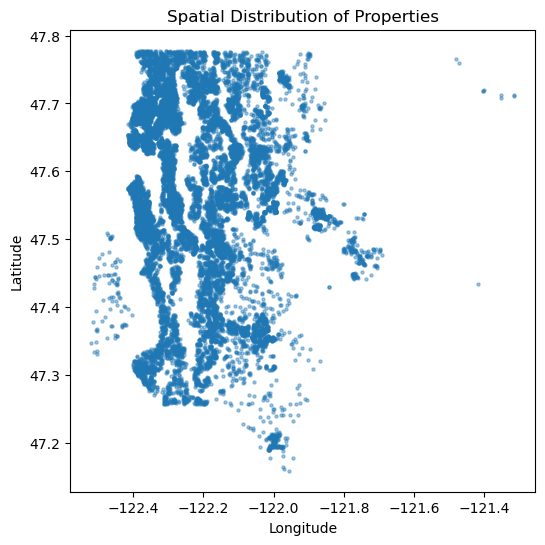

In [32]:
# Latitude–Longitude Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(
    df["long"],
    df["lat"],
    s=5,
    alpha=0.4
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Properties")
plt.show()


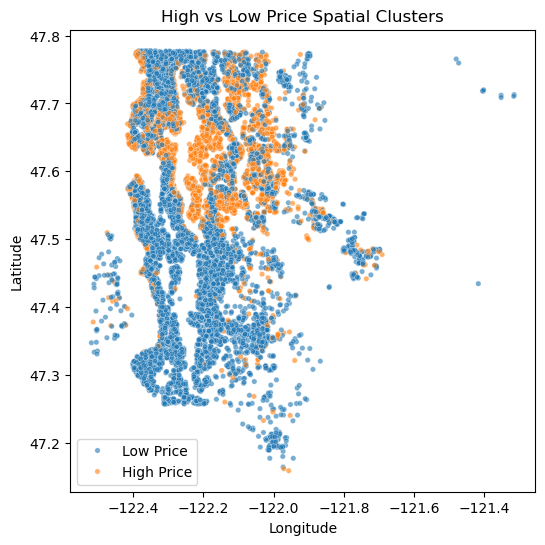

In [33]:
# High-Price vs Low-Price Clusters
price_threshold = df["price"].quantile(0.75)

df["price_category"] = np.where(
    df["price"] >= price_threshold,
    "High Price",
    "Low Price"
)
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="long",
    y="lat",
    hue="price_category",
    data=df,
    alpha=0.6,
    s=15
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("High vs Low Price Spatial Clusters")
plt.legend()
plt.show()


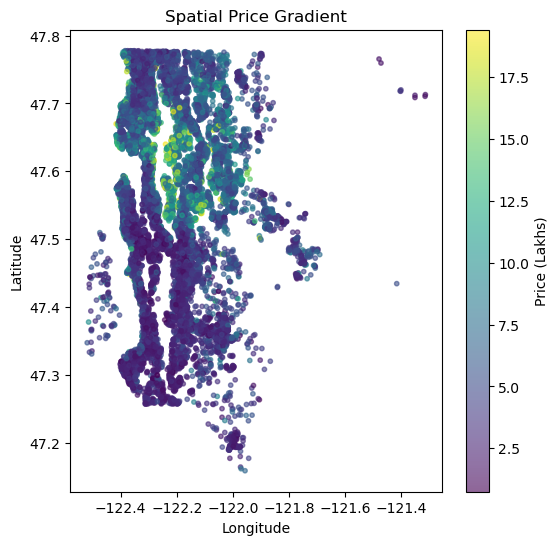

In [34]:
plt.figure(figsize=(6,6))
sc = plt.scatter(
    df["long"],
    df["lat"],
    c=df["price"] / 1e5,  # Lakhs
    cmap="viridis",
    s=10,
    alpha=0.6
)

plt.colorbar(sc, label="Price (Lakhs)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Price Gradient")
plt.show()


Download Satellite image using mapbox api

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


import os
from time import sleep

# ================= CONFIG =================
MAPBOX_TOKEN = "pk.eyJ1IjoiYW1hbi1zZHMiLCJhIjoiY21qYjRmZGJ1MDZiMDNlcXU5MHBtcm5ldSJ9.mQwuKyjiomJFuHAi-vmk4g"   # <-- apna token yahin daalo
ZOOM = 18
IMG_SIZE = "256x256"
STYLE = "mapbox/satellite-v9"

DATA_PATH = "/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/clean_train.csv"
SAVE_DIR = "data/images/train"

# =========================================

# folder ensure
os.makedirs(SAVE_DIR, exist_ok=True)

# data load
df = pd.read_csv(DATA_PATH)

print("Total properties:", len(df))

for i, row in df.iterrows():
    lat = row["lat"]
    lon = row["long"]
    pid = row["id"]

    img_path = f"{SAVE_DIR}/{pid}.jpg"

    # agar image pehle se hai, skip
    if os.path.exists(img_path):
        continue

    url = (
        f"https://api.mapbox.com/styles/v1/{STYLE}/static/"
        f"{lon},{lat},{ZOOM}/{IMG_SIZE}"
        f"?access_token={MAPBOX_TOKEN}"
    )

    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content))
        img.save(img_path)

        if i % 100 == 0:
            print(f"{i} images downloaded...")

        sleep(0.15)  # rate-limit safe

    except Exception as e:
        print(f"Failed for ID {pid}")

print("✅ All images downloaded")


Total properties: 16046
Failed for ID 9320600020
15400 images downloaded...
15500 images downloaded...
15600 images downloaded...
Failed for ID 6076500364
15700 images downloaded...
15800 images downloaded...
15900 images downloaded...
Failed for ID 4027700799
16000 images downloaded...
✅ All images downloaded


In [ ]:
# just check all images are properly download or not

import os
import pandas as pd

df = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/clean_train.csv")

img_dir = "data/images/train"

available_ids = set(
    int(fname.split(".")[0])
    for fname in os.listdir(img_dir)
    if fname.endswith(".jpg")
)

df_img = df[df["id"].isin(available_ids)]

print("Total rows in dataset :", len(df))
print("Rows with images     :", len(df_img))


Total rows in dataset : 16046
Rows with images     : 16043


In [59]:
pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 1.2 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.1/808.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


In [14]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),   # resize
    transforms.ToTensor(),           # image → tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet mean
        std=[0.229, 0.224, 0.225]    # ImageNet std
    )
])


In [15]:
img_path = "/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/images/train/1000102.jpg"  # kisi bhi ID ki image

img = Image.open(img_path).convert("RGB")
img_tensor = image_transform(img)

print(img_tensor.shape)


torch.Size([3, 224, 224])


In [ ]:
# Dataset

TABULAR_COLS = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "floors",
    "grade"
]

TARGET_COL = "log_price"


In [ ]:

from torch.utils.data import Dataset
import os

class HousePriceDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # image
        img_path = os.path.join(self.img_dir, f"{row['id']}.jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # tabular features
        tabular = torch.tensor(
            row[TABULAR_COLS].astype(float).values,
            dtype=torch.float32
        )

        # target
        price = torch.tensor(row[TARGET_COL], dtype=torch.float32)

        return image, tabular, price


In [26]:
dataset = HousePriceDataset(
    df=df_img,                     # filtered dataframe
    img_dir="data/images/train",
    transform=image_transform
)

img, tab, y = dataset[0]

print(img.shape)
print(tab.shape)
print(y)


torch.Size([3, 224, 224])
torch.Size([5])
tensor(12.5011)


Model

In [ ]:
# model


import torch.nn as nn
import torchvision.models as models

class MultimodalPriceModel(nn.Module):
    def __init__(self, num_tabular_features):
        super().__init__()

        # CNN backbone
        self.cnn = models.resnet18(pretrained=True)
        self.cnn.fc = nn.Identity()   # remove final classification layer

        cnn_out_features = 512  # ResNet18 output

        # Tabular branch
        self.tabular_fc = nn.Sequential(
            nn.Linear(num_tabular_features, 32),
            nn.ReLU()
        )

        # Fusion head
        self.regressor = nn.Sequential(
            nn.Linear(cnn_out_features + 32, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, image, tabular):
        img_feat = self.cnn(image)
        tab_feat = self.tabular_fc(tabular)

        combined = torch.cat([img_feat, tab_feat], dim=1)
        price = self.regressor(combined)

        return price.squeeze()


In [28]:
model = MultimodalPriceModel(
    num_tabular_features=len(TABULAR_COLS)
)

print(model)


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MultimodalPriceModel(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [29]:
img, tab, y = dataset[0]

# batch dimension add karo
img = img.unsqueeze(0)
tab = tab.unsqueeze(0)

pred = model(img, tab)

print("Predicted price:", pred.item())


Predicted price: 1.8692816495895386


In [119]:
from torch.utils.data import Subset

# sirf pehle 4000 samples use karo
dataset_small = Subset(dataset, range(14000))


In [120]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset_small,
    batch_size=4,
    shuffle=True,
    num_workers=0
)


In [121]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [122]:
import torch

device = torch.device("cpu")
print("Using device:", device)


Using device: cpu


In [123]:
model = model.to(device)
model = model.float()


In [124]:
model.train()

EPOCHS = 2  # pehle kam rakhenge

for epoch in range(EPOCHS):
    total_loss = 0

    for images, tabular, prices in train_loader:
        images = images.to(device)
        tabular = tabular.to(device)
        prices = prices.to(device)
        
        optimizer.zero_grad()

        preds = model(images, tabular)
        loss = criterion(preds, prices)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f}")


Epoch [1/2] - Loss: 0.1958
Epoch [2/2] - Loss: 0.1525


In [23]:
print(df.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')


In [125]:
model.eval()

img, tab, y = dataset[0]
img = img.unsqueeze(0).to(device)
tab = tab.unsqueeze(0).to(device)

with torch.no_grad():
    pred_log = model(img, tab)

# log → actual price
import numpy as np
pred_price = np.exp(pred_log.item())

print("Actual price:", np.exp(y.item()))
print("Predicted price:", pred_price)


Actual price: 268644.0375605099
Predicted price: 285652.5443243985


In [40]:
# error jaada aa rha h , ek baar train dataset pe price pridict krke dekh leta hu
model.eval()


MultimodalPriceModel(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [210]:
idx = 50
img, tab, y = dataset[idx]


In [211]:
img = img.unsqueeze(0).to(device)
tab = tab.unsqueeze(0).to(device)


In [ ]:
with torch.no_grad():
    pred_log = model(img, tab)


In [213]:
actual_price = np.exp(y.item())
predicted_price = np.exp(pred_log.item())

print("Train sample index:", idx)
print("Actual price     :", actual_price)
print("Predicted price  :", predicted_price)
print("Difference       :", abs(actual_price - predicted_price))


Train sample index: 50
Actual price     : 499901.16103408474
Predicted price  : 767006.1153586137
Difference       : 267104.9543245289


In [ ]:
# mai na ab jo mera actual price h usko predicted price se compare krunga and error bhi dekhunga 

In [ ]:


model.eval()

rows = []

with torch.no_grad():
    for i in range(len(dataset)):
        img, tab, y = dataset[i]

        img = img.unsqueeze(0).to(device)
        tab = tab.unsqueeze(0).to(device)

        pred_log = model(img, tab)

        actual_price = np.exp(y.item())
        predicted_price = np.exp(pred_log.item())
        abs_error = abs(actual_price - predicted_price)
        pct_error = (abs_error / actual_price) * 100

        rows.append([
            df_img.iloc[i]["id"],
            actual_price,
            predicted_price,
            abs_error,
            pct_error
        ])


In [136]:
# csv file m save kro
results_df = pd.DataFrame(
    rows,
    columns=[
        "id",
        "actual_price",
        "predicted_price",
        "absolute_error",
        "percentage_error"
    ]
)

results_df.to_csv("train_actual_vs_predicted.csv", index=False)

print("CSV saved: train_actual_vs_predicted.csv ✅")


CSV saved: train_actual_vs_predicted.csv ✅


In [137]:
print(results_df.head(10))


           id   actual_price  predicted_price  absolute_error  \
0  9117000170  268644.037561    285652.544324    17008.506764   
1  6700390210  245000.997970    256507.978069    11506.980099   
2  7212660540  200000.986033    249651.245697    49650.259664   
3  8562780200  352500.093895    304019.297939    48480.795956   
4  7760400350  232000.998814    264281.677839    32280.679025   
5   464001025  722500.757386    713740.225579     8760.531807   
6  3432500486  299996.048507    303948.561932     3952.513425   
7  1126059095  880001.012566    681058.279044   198942.733522   
8  3876500290  175000.998556    167342.946908     7658.051648   
9  1865400075  320001.112093    372931.561251    52930.449158   

   percentage_error  
0          6.331243  
1          4.696707  
2         24.825007  
3         13.753414  
4         13.914026  
5          1.212529  
6          1.317522  
7         22.607103  
8          4.376005  
9         16.540708  


In [138]:
print("Mean Absolute Error (₹):", results_df["absolute_error"].mean())
print("Mean Percentage Error (%):", results_df["percentage_error"].mean())


Mean Absolute Error (₹): 90355.23210513046
Mean Percentage Error (%): 16.832485582879272


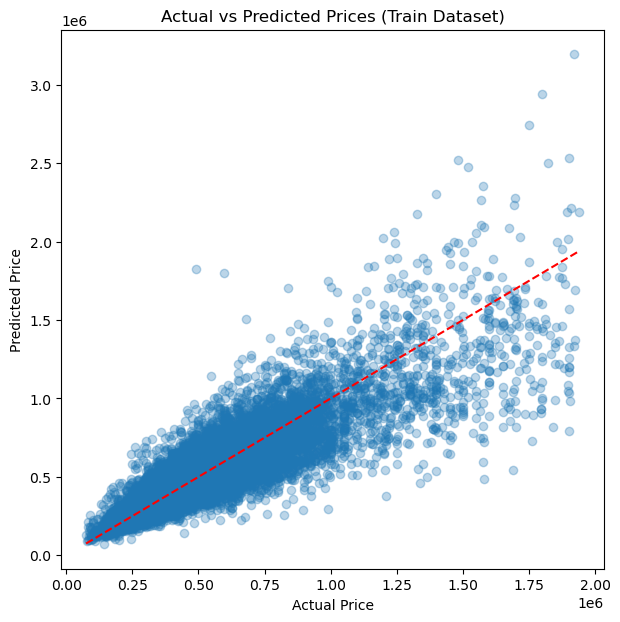

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(
    results_df["actual_price"],
    results_df["predicted_price"],
    alpha=0.3
)

plt.plot(
    [results_df["actual_price"].min(), results_df["actual_price"].max()],
    [results_df["actual_price"].min(), results_df["actual_price"].max()],
    "r--"
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Train Dataset)")
plt.show()


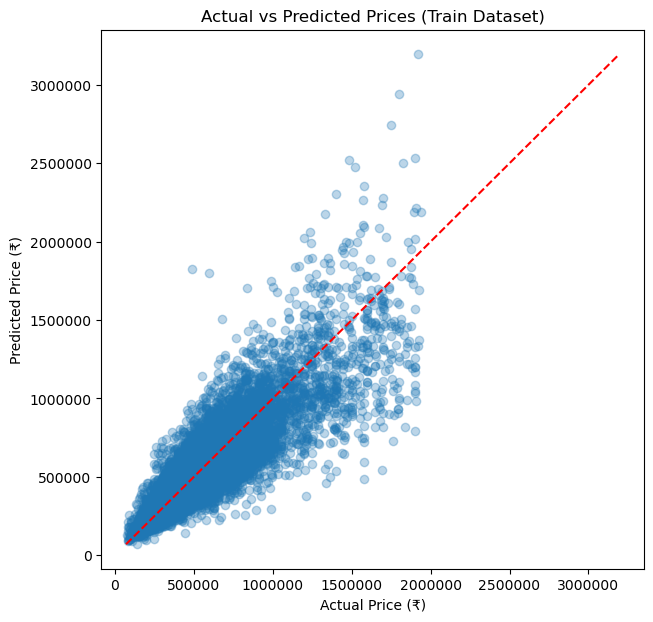

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

plt.scatter(
    results_df["actual_price"],
    results_df["predicted_price"],
    alpha=0.3
)

# perfect prediction line
min_p = min(results_df["actual_price"].min(),
            results_df["predicted_price"].min())
max_p = max(results_df["actual_price"].max(),
            results_df["predicted_price"].max())

plt.plot([min_p, max_p], [min_p, max_p], "r--")

plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Prices (Train Dataset)")
plt.ticklabel_format(style="plain", axis="both")  # no scientific notation

plt.show()


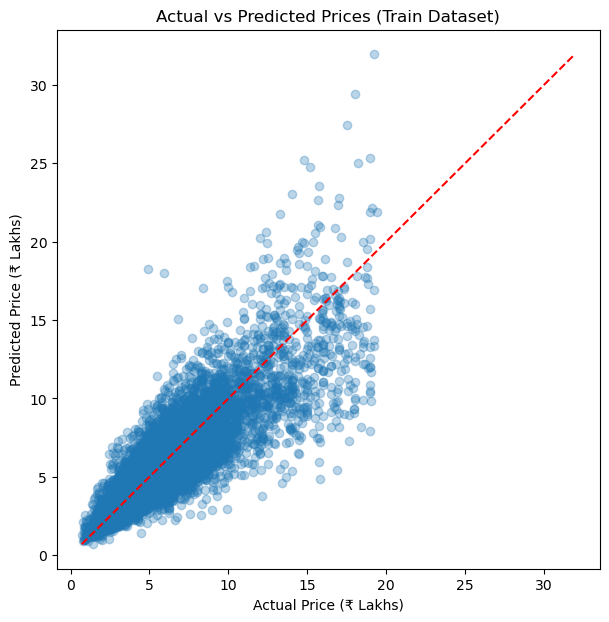

In [142]:
plt.figure(figsize=(7,7))

plt.scatter(
    results_df["actual_price"]/1e5,
    results_df["predicted_price"]/1e5,
    alpha=0.3
)

plt.plot(
    [min_p/1e5, max_p/1e5],
    [min_p/1e5, max_p/1e5],
    "r--"
)

plt.xlabel("Actual Price (₹ Lakhs)")
plt.ylabel("Predicted Price (₹ Lakhs)")
plt.title("Actual vs Predicted Prices (Train Dataset)")
plt.show()


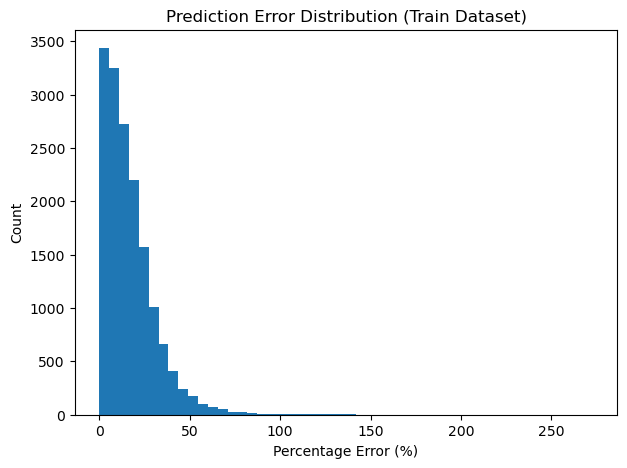

In [143]:
# error distribution
plt.figure(figsize=(7,5))
plt.hist(results_df["percentage_error"], bins=50)
plt.xlabel("Percentage Error (%)")
plt.ylabel("Count")
plt.title("Prediction Error Distribution (Train Dataset)")
plt.show()


ab test dataset ka price nikalte h

In [144]:
df_test = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/clean_test.csv") 

In [145]:
# test images download kr rha hu
import os
import requests
from tqdm import tqdm


In [146]:
# ===== CONFIG =====
MAPBOX_TOKEN = "pk.eyJ1IjoiYW1hbi1zZHMiLCJhIjoiY21qYjRmZGJ1MDZiMDNlcXU5MHBtcm5ldSJ9.mQwuKyjiomJFuHAi-vmk4g"

IMAGE_SIZE = "256x256"
ZOOM = 18
MAP_STYLE = "satellite-v9"

TEST_IMAGE_DIR = "data/images/test"
os.makedirs(TEST_IMAGE_DIR, exist_ok=True)


In [147]:
print(df_test.columns)


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [148]:
def download_test_images(df, save_dir):
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_id = row["id"]
        lat = row["lat"]        # change if column name different
        lon = row["long"]

        img_path = os.path.join(save_dir, f"{img_id}.jpg")

        # skip if already downloaded
        if os.path.exists(img_path):
            continue

        url = (
            f"https://api.mapbox.com/styles/v1/mapbox/{MAP_STYLE}/static/"
            f"{lon},{lat},{ZOOM}/{IMAGE_SIZE}"
            f"?access_token={MAPBOX_TOKEN}"
        )

        try:
            r = requests.get(url, timeout=10)
            if r.status_code == 200:
                with open(img_path, "wb") as f:
                    f.write(r.content)
        except Exception as e:
            print(f"Failed for ID {img_id}: {e}")


In [150]:
download_test_images(df_test, TEST_IMAGE_DIR)


 44%|████▎     | 2353/5404 [37:06<69:08:29, 81.58s/it]

Failed for ID 8682262170: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))


100%|██████████| 5404/5404 [1:25:33<00:00,  1.05it/s] 


In [151]:
import os
print("Downloaded:", len(os.listdir(TEST_IMAGE_DIR)))
print("Expected:", len(df_test))


Downloaded: 5395
Expected: 5404


In [164]:
class HousePriceDataset(Dataset):
    def __init__(self, df, img_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = os.path.join(self.img_dir, f"{row['id']}.jpg")

        # ✅ MISSING IMAGE SAFE
        if not os.path.exists(img_path):
            return None

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        tabular = torch.tensor(
            row[TABULAR_COLS].astype(float).values,
            dtype=torch.float32
        )

        return image, tabular, row["id"]


In [165]:
df_test = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/data/clean_test.csv")


In [166]:
# RECREATE test dataset
test_dataset = HousePriceDataset(
    df=df_test,
    img_dir="data/images/test",
    transform=image_transform,
    is_test=True
)


In [167]:
import os
import csv
import torch
from tqdm import tqdm

# ===============================
# CONFIG
# ===============================
device = torch.device("cpu")   # heat issue ke liye CPU
model.to(device)
model.eval()

OUTPUT_CSV = "test_predictions.csv"

# ===============================
# Resume support (already predicted ids)
# ===============================
done_ids = set()
if os.path.exists(OUTPUT_CSV):
    with open(OUTPUT_CSV, "r") as f:
        reader = csv.reader(f)
        next(reader, None)
        for row in reader:
            done_ids.add(row[0])

if len(done_ids) == 0:
    print("Starting fresh prediction...")
else:
    print(f"Resuming prediction, already done: {len(done_ids)}")

# ===============================
# Prediction Loop
# ===============================
with open(OUTPUT_CSV, "a", newline="") as f:
    writer = csv.writer(f)

    # header agar file naya hai
    if len(done_ids) == 0:
        writer.writerow(["id", "predicted_price"])

    for i in tqdm(range(len(test_dataset))):
        sample = test_dataset[i]

        # 👇 missing image case
        if sample is None:
            continue

        img, tab, row_id = sample

        # skip already done
        if str(row_id) in done_ids:
            continue

        img = img.unsqueeze(0).to(device)
        tab = tab.unsqueeze(0).to(device)

        with torch.no_grad():
            pred = model(img, tab)

            # agar log-price train kiya tha
            pred_price = torch.exp(pred).item()

        writer.writerow([row_id, pred_price])
        done_ids.add(str(row_id))

print("✅ Test prediction completed!")
print(f"Total predictions saved: {len(done_ids)}")
print(f"Output file: {OUTPUT_CSV}")


Resuming prediction, already done: 2349


100%|██████████| 5404/5404 [01:00<00:00, 89.92it/s] 

✅ Test prediction completed!
Total predictions saved: 5395
Output file: test_predictions.csv


In [168]:
# load predicted prices
pred_df = pd.read_csv("test_predictions.csv")

print(pred_df.head())


           id  predicted_price
0  2591820310     3.683148e+05
1  7974200820     8.161172e+05
2  7701450110     1.119512e+06
3  9522300010     9.848459e+05
4  9510861140     5.212392e+05


In [215]:
pred_df["predicted_price"] = (
    pred_df["predicted_price"]
    .astype(float)
    .round(0)
    .astype(int)
)


In [216]:
print(pred_df.head())


           id  predicted_price
0  2591820310           368315
1  7974200820           816117
2  7701450110          1119512
3  9522300010           984846
4  9510861140           521239


In [218]:
df_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


In [219]:
final_test_df = df_test.merge(
    pred_df,
    on="id",
    how="left"
)


In [220]:
print(final_test_df[["id", "predicted_price"]].head())


           id  predicted_price
0  2591820310         368315.0
1  7974200820         816117.0
2  7701450110        1119512.0
3  9522300010         984846.0
4  9510861140         521239.0


In [221]:
final_test_df.to_csv(
    "final_test_with_predictions.csv",
    index=False
)


In [224]:
from sklearn.metrics import r2_score
import numpy as np
df_train=pd.read_csv('/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/train_actual_vs_predicted.csv')

y_true = df_train["actual_price"].values
y_pred = df_train["predicted_price"].values

r2 = r2_score(y_true, y_pred)
print("R2 score:", r2)


R2 score: 0.7548942441714873


In [240]:

df = pd.read_csv("/Users/prashantmaurya/Desktop/Satellite_Property_Valuation/final_test_with_predictions.csv")

df = df[["id", "predicted_price"]]



df.to_csv("23113119_final.csv", index=False)

print(" Final file saved: 23113119_final.csv")
print(df.head())


 Final file saved: 23113119_final.csv
           id  predicted_price
0  2591820310         368315.0
1  7974200820         816117.0
2  7701450110        1119512.0
3  9522300010         984846.0
4  9510861140         521239.0
